In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from skimage import io
import skimage as si
import skimage.filters as sif
import skimage.segmentation as sis
import skimage.measure as sime
import skimage.morphology as simo
import skimage.color as sic

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import imagecodecs as ic
from matplotlib import colors

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

#FUNKCJE POMOCNICZE

def pokaz(im, tytul = "", osie = False):
    if not(osie):
        plt.axis("off") 
    if im.ndim == 2:
        plt.imshow(im,cmap='gray')
    else:
        plt.imshow(im)
    plt.title(tytul)
    
def pliob(listaobr, ile_k = 1, listatyt = [], wart_dpi = 100, osie = False):
    # wyswietla liste obrazow kolorowych lub s skali szarosci
    rozm_obr = 5
    ile = len(listaobr)
    if len(listatyt) == 0:
        listatyt = [' ']*ile
    ile_w = np.ceil(ile / ile_k).astype(int)
    figsize_k = rozm_obr*ile_k
    figsize_w = rozm_obr*ile_w
    plt.figure(figsize=(figsize_k,figsize_w), dpi = wart_dpi)
    for i in range(0,ile):
        if isinstance(listaobr[i],np.ndarray):
            plt.subplot(ile_w,ile_k,i+1)
            pokaz(listaobr[i], listatyt[i], osie)
    plt.show()
    
def segmkol(obr, prog_dol, prog_gora):
    # funkcja proguje trzy składowe koloru
    maska = (obr[:,:,0] > prog_dol[0]) & (obr[:,:,0] < prog_gora[0])
    maska = maska & (obr[:,:,1] > prog_dol[1]) & (obr[:,:,1] < prog_gora[1])
    maska = maska & (obr[:,:,2] > prog_dol[2]) & (obr[:,:,2] < prog_gora[2])
    return maska        

> Wykonanie etykietowania obiektów, w efekcie którego każdy obiekt otrzyma swoją unikalną etykietę. Kod umożliwiający policzenie wszystkich obiektów na obrazie i wyświetl wyznaczoną w ten sporó liczbe obiektów.

[[200 190  24]
 [203   2   2]
 [254 254 254]]


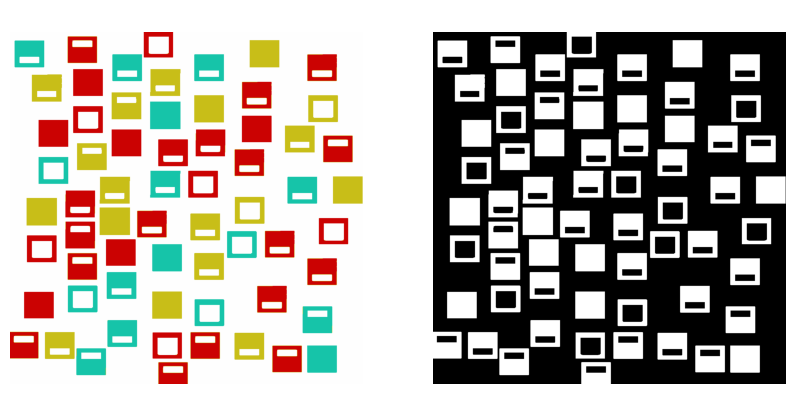

ile obiektow:  64


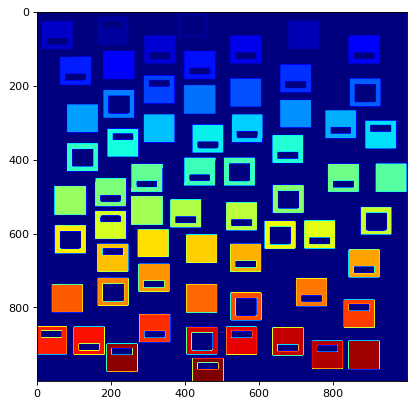

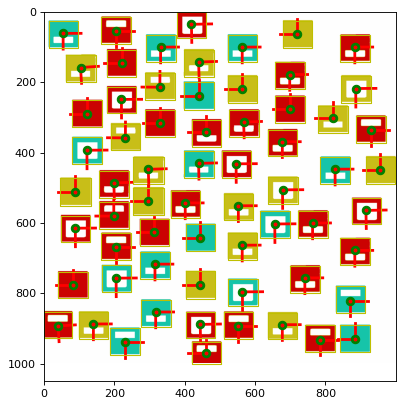

In [125]:
# miejsce na kod
# cecha charakterystyczna - kolor
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans

o = io.imread('PRiADspr3_A.png')
b = o[:,:,1]<255
# pliob([o,b],2)

# etykiety = sime.label(b)
# plt.figure(figsize=(6,6), dpi = 80)
# plt.imshow(etykiety,'jet')

# cechy = sime.regionprops(etykiety)
# plt.figure(figsize=(6,6), dpi = 80)
# plt.imshow(etykiety, cmap=plt.cm.gray)
# for obiekt in cechy:
#     y0, x0 = obiekt.centroid
#     plt.plot(x0, y0, '.r', markersize=5)
#     minr, minc, maxr, maxc = obiekt.bbox
#     bx = (minc, maxc, maxc, minc, minc)
#     by = (minr, minr, maxr, maxr, minr)
#     plt.plot(bx, by, '-y', linewidth=1)

# plt.show()

kolory = (o.reshape(-1, o.shape[2])) # kolory w obrazie

df = pd.DataFrame(kolory, columns= ['R','G','B'])
# df = df[(df['R']>200) & (df['G']>200) & (df['B']>200)]


model = KMeans(n_clusters=4, random_state=0)
model.fit(df)

df_com = model.predict(df)
df_com = df_com.reshape(o.shape[0],o.shape[1])

kolory_centra = model.cluster_centers_

new_o = np.zeros_like(o)

for i in range(new_o.shape[0]):
    for j in range(new_o.shape[1]):
        new_o[i,j] = kolory_centra[df_com[i,j]]


o = new_o 

# sns.pairplot(df)
# df['kolor'] = model.labels_
# df['suma'] = df['R']+ df['G']+ df['G']
# kolory = df.groupby(['kolor']).mean()
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(df['R'], df['G'], df['G'], c = df['kolor'])
kolory = np.unique(o.reshape(-1, o.shape[2]), axis=0) # kolory w obrazie
kolory = kolory[1:7,:] # usuwa kolor tła
print(kolory)

b = o[:,:,1]<250
pliob([o,b],2)

etykiety = sime.label(b)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(etykiety,'jet')

cechy = sime.regionprops(etykiety)
plt.figure(figsize=(6,6), dpi = 80)
plt.imshow(o, cmap = plt.cm.gray)


for obj in cechy:
    y0, x0 = obj.centroid

    orientation = obj.orientation

    min_r, min_c, max_r, max_c = obj.bbox
    bx = (min_c, max_c, max_c, min_c, min_c)
    by = (min_r, min_r, max_r, max_r, min_r)

    x1 = x0 + math.cos(orientation) * 0.5 * obj.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * obj.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * obj.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * obj.axis_major_length

    plt.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    plt.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    plt.plot(x0, y0, '.g', markersize=15)

    plt.plot(x0, y0, '.r', markersize = 5)
    plt.plot(bx, by, '-y', linewidth = 1)
    
    
ile_obiektow = len(cechy)
print("ile obiektow: ",ile_obiektow)
# for i in range(len(o)):
#     for j in range(len(o[i])):
#         o[i][j] = kolory.loc[(kolory.index == df.loc[(df['R']==o[i][j][0]) & (df['G']==o[i][j][1]) & (df['B']==o[i][j][2])]['kolor'])]

# pokaz(o)
# dol = (15,190,150)
# gora = (20,200,200)
# green_bin = segmkol(obr, dol, gora)

# dol = (190,170,15)
# gora = (200,200,20)
# yellow_bin = segmkol(obr, dol, gora)

# dol = (190,-10,-10)
# gora = (210,1,1)
# red_bin = segmkol(obr, dol, gora)


# etykiety_green = sime.label(green_bin)
# etykiety_yellow = sime.label(yellow_bin)
# etykiety_red = sime.label(red_bin)

# obiekty_green = sime.regionprops(etykiety_green)
# obiekty_yellow = sime.regionprops(etykiety_yellow)
# obiekty_red = sime.regionprops(etykiety_red)

# print('wszystkie obiekty: ', len(obiekty_green) + len(obiekty_yellow) + len(obiekty_red))
# plt.figure(figsize=(6,6), dpi = 80)
# plt.imshow(obr, cmap=plt.cm.gray)
# for obiekt in obiekty_green + obiekty_yellow + obiekty_red:
#     y0, x0 = obiekt.centroid
#     plt.plot(x0, y0, '.r', markersize=5)
#     minr, minc, maxr, maxc = obiekt.bbox
#     bx = (minc, maxc, maxc, minc, minc)
#     by = (minr, minr, maxr, maxr, minr)
#     plt.plot(bx, by, '-y', linewidth=1)
# plt.show()



> Dobieranie cech umożliwiających rozróżnienie kolorow obiektów. Wyodrębnienie do odrębnych obrazów obiektow z poszczególnych kategorii.

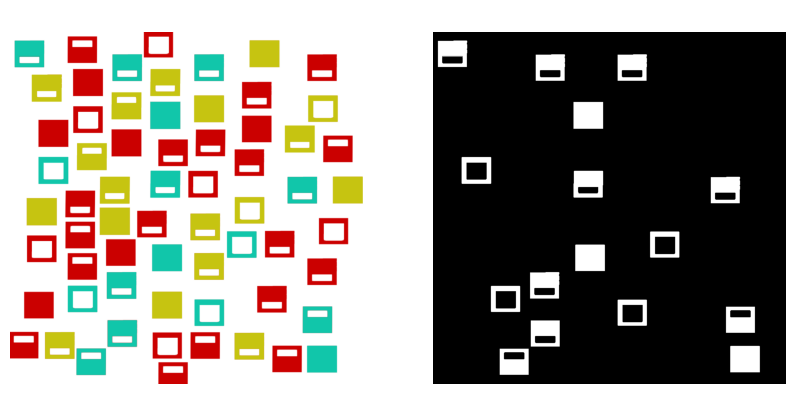

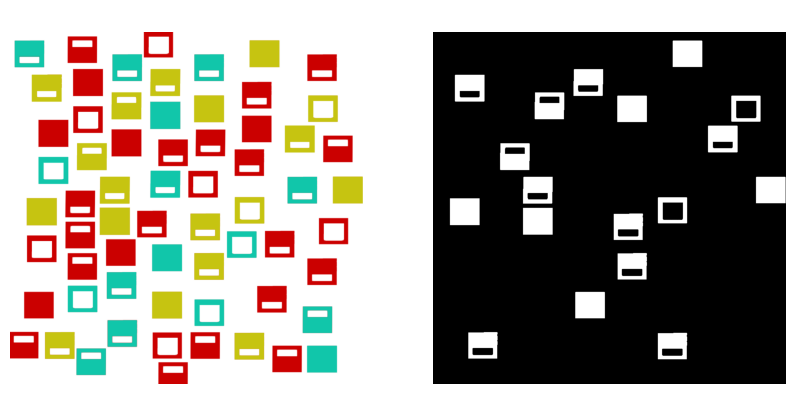

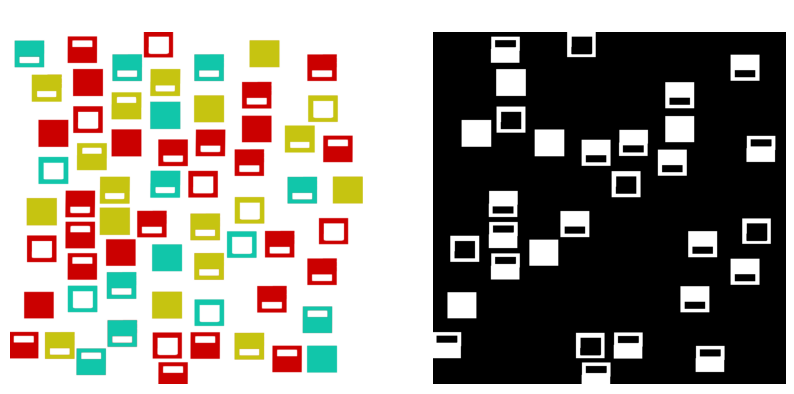

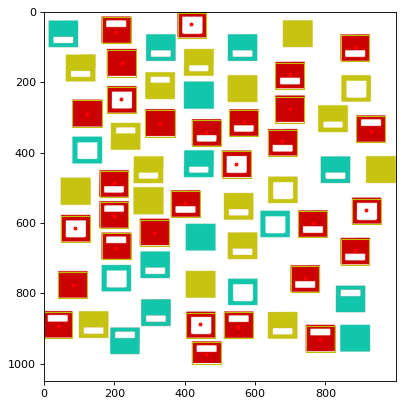

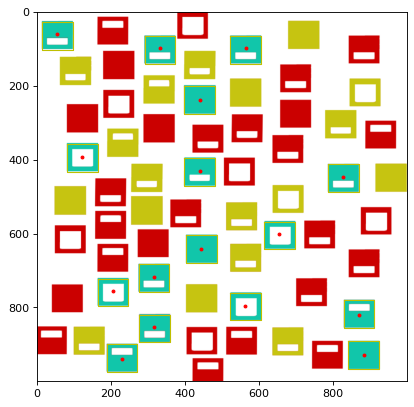

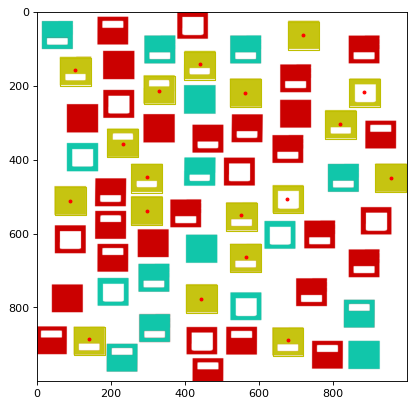

In [10]:
# miejsce na kod
pliob([obr,green_bin],2)
pliob([obr,yellow_bin],2)
pliob([obr,red_bin],2)

for kolor in [obiekty_red, obiekty_green, obiekty_yellow]:
    plt.figure(figsize=(6,6), dpi = 80)
    plt.imshow(obr, cmap=plt.cm.gray)
    for obiekt in kolor:
        y0, x0 = obiekt.centroid
        plt.plot(x0, y0, '.r', markersize=5)
        minr, minc, maxr, maxc = obiekt.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        plt.plot(bx, by, '-y', linewidth=1)
    plt.show()




> Zliczanie obiekty w każdej kategorii

In [11]:
# miejsce na kod
print('obiekty zolte: ', len(obiekty_yellow))
print('obiekty czerwone: ', len(obiekty_red))
print('obiekty zielone: ', len(obiekty_green))

obiekty zolte:  18
obiekty czerwone:  30
obiekty zielone:  16
